# EDA - Analisis Exploratorio 

In [2]:
# Importamos 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud 
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from datetime import datetime

### Analisis de Sentimientos

In [17]:
# Cargamos el Dataset con el archivo user_reviews 
# Recordemos que la columna 'review' contiene datos provistos 
# por un analisis de sentimientos hecho a las reseñas del juego 

df = pd.read_parquet('./Datasets/user_reviews.parquet')

In [5]:
df.describe(include='all')

,user_id,posted,item_id,recommend,review
count,29638,29627.0,29638.000000,29638,29638.000000
unique,16711,<NA>,NaN,2,NaN
top,MIMMATA,<NA>,NaN,True,NaN
freq,20,<NA>,NaN,26862,NaN
mean,NaN,2014.430418,155331.003172,NaN,1.416762
std,NaN,0.993996,132034.111787,NaN,0.656059
min,NaN,2010.0,10.000000,NaN,0.000000
25%,NaN,2014.0,2655.000000,NaN,1.000000
50%,NaN,2014.0,208090.000000,NaN,2.000000
75%,NaN,2015.0,252490.000000,NaN,2.000000


De esta primera observacion podemos notar que tenemos mas recomendaciones True (positivas) y con una clasificacion mayoritariamente de 2 (positiva) en las reviews

*En Reviews '0' es malo, '1' es neutro, '2' es positivo segun el analisis de sentimientos*

In [6]:
# Conteo de valores únicos en la columna 'review' 
conteo_reviews = df['review'].value_counts()

# Calcula el porcentaje de cada valor único
porcentaje = (conteo_reviews / len(df)) * 100

# Creamos un nuevo DataFrame para mostrar los resultados
df_sentimientos_conteo = pd.DataFrame({'Sentimientos': conteo_reviews.index, 'Conteo': conteo_reviews.values, 'Porcentaje': porcentaje.values})

# Muestra el DataFrame con los conteos y porcentajes
print(df_sentimientos_conteo)

   Sentimientos  Conteo  Porcentaje
0             2   15128   51.042580
1             1   11734   39.591066
2             0    2776    9.366354


Para visualizar mejor la relacion lo graficaremos

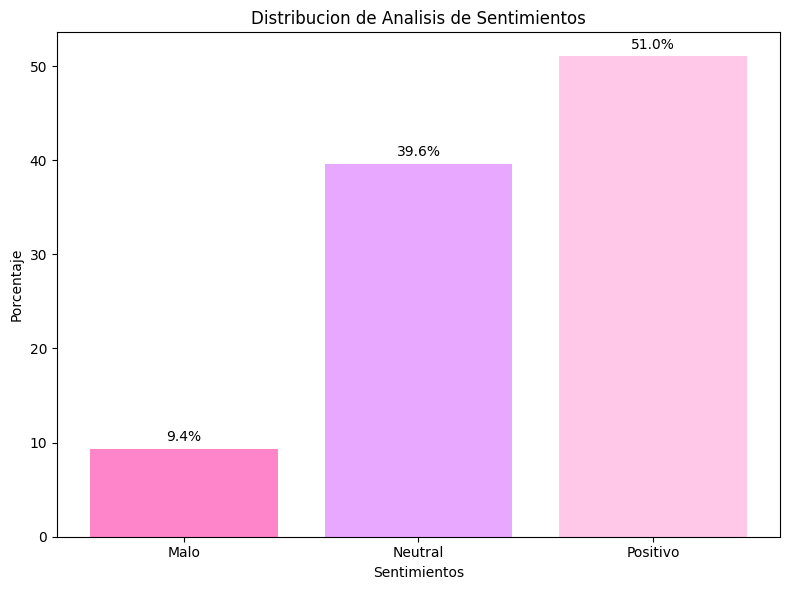

In [7]:
# Ordenamos el DataFrame por los valores de 'Sentimientos'
df_sentimientos_conteo = df_sentimientos_conteo.sort_values(by='Sentimientos')

# Paleta de colores con tonos de lilas y rosas
colors = ['#FF85CB', '#E8A8FF', '#FFC7E8']

# Grafica los porcentajes de cada valor único
plt.figure(figsize=(8, 6))
bars = plt.bar(df_sentimientos_conteo['Sentimientos'], df_sentimientos_conteo['Porcentaje'], color= colors)

# Agregamos etiquetas a las columnas para cada valor
plt.xlabel('Sentimientos')
plt.ylabel('Porcentaje')
plt.title('Distribucion de Analisis de Sentimientos')
plt.xticks(rotation=45)
# Define las etiquetas para las columnas debajo de cada barra
plt.xticks(ticks=[0, 1, 2], labels=['Malo', 'Neutral', 'Positivo'], rotation=0)

# Agregamos los porcentajes sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

En este caso, se analizó como positivas aquellas reseñas con polaridad positiva y recomendación positiva, neutras a las reseñas con polaridad igual o inferior a 0 y recomendación positiva, y malas a las reseñas con polaridad negativa y recomendación negativa. Teniendo esto en cuenta, los sentimientos de los usuarios se manifestaron de la siguiente manera:

La alta proporción de sentimientos positivos, 51%, indica que la mayoría de los usuarios están contentos con los juegos o experiencias proporcionadas.
Las reseñas neutras también son significativas, con un 39,6%, lo que sugiere que algunos usuarios tienen opiniones mixtas o no expresan una opinión clara sobre los juegos, aunque sí los recomendarían.
Las reseñas negativas, con un 9.4%, aunque menos comunes, son importantes para identificar áreas de mejora y abordar posibles problemas que los usuarios puedan estar experimentando.

#### Nube de palabras frecuentes en Reviews :

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('game', 18045), ('good', 4081), ('fun', 3671), ('great', 3346), ('play', 3071), ('like', 2505), ('best', 2416), ('get', 2265), ('hat', 2062), ('would', 1903)]


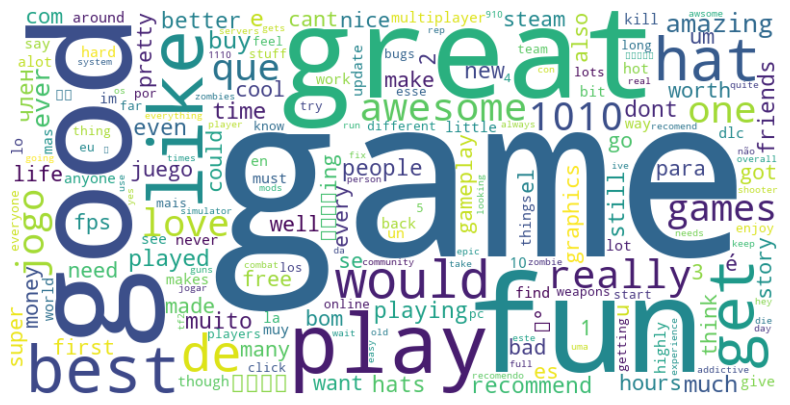

In [9]:
# Descargamos la lista de stopwords
nltk.download('stopwords')

# Obtenemos la lista en inglés
stop_words = set(stopwords.words('english'))

df_reviews = pd.read_parquet('./Datasets/review_column.parquet')

# Limpiamos y tokenizamos el texto de la columna review, excluyendo stopwords
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    tokens = text.split()  # Tokenizar el texto
    tokens = [word for word in tokens if word not in stop_words]  # Filtrar stopwords
    return tokens

# Contamos las palabras que se repiten en la columna review
words_counter = Counter()
for review in df_reviews['review']:
    words_counter.update(clean_text(str(review)))

# Mostrar las 10 palabras más comunes como ejemplo
print(words_counter.most_common(10))

# Creamos la nube de palabras con colores personalizados
cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(words_counter)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Las palabras mas frecuentes son: \
('game', 18045) \
('good', 4081) \
('fun', 3671) \
('great', 3346)  \
('play', 3071) \
('like', 2505) \
('best', 2416) \
('get', 2265) \
('hat', 2062) \
('would', 1903)

Esto nos da una idea de los términos más utilizados en las revisiones de juegos. Algunas conclusiones posibles podrían ser: 

1- *Énfasis en la experiencia del juego:* Palabras como 'game', 'play', 'fun' y 'great' sugieren que los jugadores están centrados en la experiencia general del juego y en cómo les divierte o les entretiene. \
2- *Calidad percibida:* Palabras como 'good' y 'great' indican que los jugadores están evaluando la calidad del juego y expresando su satisfacción con aspectos específicos. \
3- *Comparaciones y opiniones personales:* 'Like' y 'would' sugieren que los jugadores pueden estar haciendo comparaciones entre juegos o expresando sus preferencias personales. \
4- *Expresiones de acción y logro:* 'Get' podría estar asociado con logros, recompensas o acciones dentro del juego, lo que indica un enfoque en las mecánicas o la jugabilidad. 

Estas conclusiones son generales y pueden variar dependiendo del contexto específico de las revisiones y los juegos analizados. Es importante analizar más a fondo las revisiones y los datos para obtener una comprensión más completa de las opiniones y tendencias de los jugadores.

#### Cantidad de reseñas por año 

In [18]:
# Conteo de valores únicos en la columna 'review' 
conteo = df['posted'].value_counts()

# Calcula el porcentaje de cada valor único
#porcentaje = (conteo / len(df)) * 100

# Creamos un nuevo DataFrame para mostrar los resultados
df_posted_conteo = pd.DataFrame({'Anio': conteo.index, 'Conteo': conteo.values})

# Ordenar el DataFrame por la columna 'Anio' de mayor a menor
df_posted_conteo = df_posted_conteo.sort_values(by='Anio', ascending=False)

# Muestra el DataFrame con los conteos y porcentajes
print(df_posted_conteo)

   Anio  Conteo
2  2016    4575
1  2015    8839
0  2014   11928
3  2013    3558
4  2012     517
5  2011     195
6  2010      15


#### Para Visualizar mejor lo graficaremos

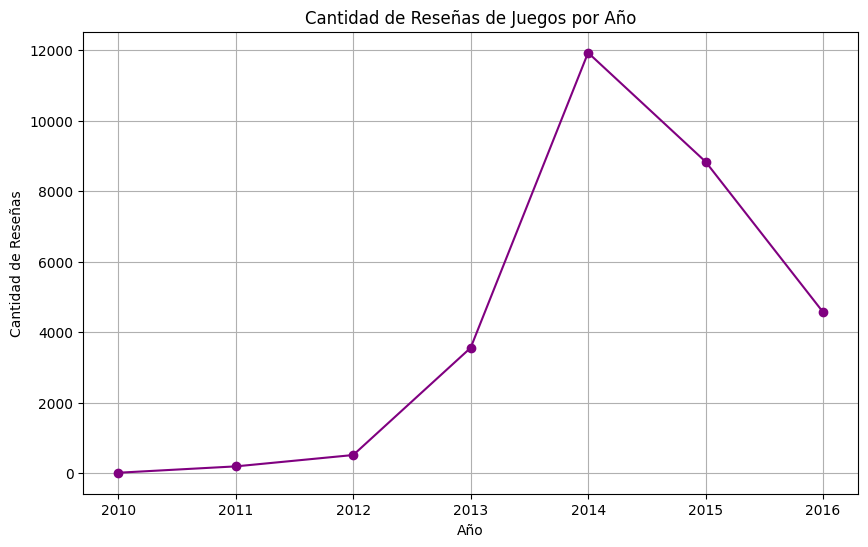

In [19]:
 
# Datos de reseñas por año
años = df_posted_conteo['Anio']
reseñas = df_posted_conteo['Conteo']

# Crear el gráfico de connected scatter plot
plt.figure(figsize=(10, 6))
plt.plot(años, reseñas, marker='o', linestyle='-', color= 'purple')

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Reseñas de Juegos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.grid(True)

# Mostrar el gráfico
plt.show()

A partir del conteo de reseñas por año, se puede observar un aumento desde 2010 hasta 2014, con un pico significativo en 2014 (11,928 reseñas). Aunque hay una disminución notable después de 2014, la cantidad de reseñas en 2015 y 2016 sigue siendo significativa. Esto sugiere que, aunque el pico de 2014 no se mantuvo, sigue habiendo una base sólida de actividad en términos de reseñas

#### Conclusión

En general, los jugadores muestran una actitud positiva y entusiasta hacia los juegos. Disfrutan de la experiencia de jugar y valoran los juegos que les proporcionan diversión y entretenimiento. Al mismo tiempo, son críticos constructivos, ofreciendo feedback que puede ser valioso para desarrolladores y la plataforma. La disposición de los jugadores a expresar sus opiniones también indica un interés en mejorar la calidad de los juegos y en compartir sus experiencias con la comunidad de jugadores.